In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("diabetes1.csv")

In [5]:
x = df.iloc[:,0:8]
y = df["Outcome"]

In [6]:
obj = StandardScaler()

In [7]:
x_ = obj.fit_transform(x)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x_, y, test_size=0.1)

In [8]:
model = models.Sequential()
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(75, activation="relu"))
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dense(25, activation="relu"))
model.add(layers.Dense(12, activation="relu"))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [9]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [10]:
history = model.fit(Xtrain, Ytrain, epochs=50, validation_data=(Xtest, Ytest))

Epoch 1/50
22/22 [==============================] - 1s 14ms/step - loss: 0.6686 - accuracy: 0.6382 - val_loss: 0.6307 - val_accuracy: 0.7143
Epoch 2/50
22/22 [==============================] - 0s 5ms/step - loss: 0.5506 - accuracy: 0.7352 - val_loss: 0.5303 - val_accuracy: 0.7403
Epoch 3/50
22/22 [==============================] - 0s 5ms/step - loss: 0.4753 - accuracy: 0.7742 - val_loss: 0.5114 - val_accuracy: 0.7013
Epoch 4/50
22/22 [==============================] - 0s 5ms/step - loss: 0.4586 - accuracy: 0.7916 - val_loss: 0.4980 - val_accuracy: 0.7532
Epoch 5/50
22/22 [==============================] - 0s 5ms/step - loss: 0.4386 - accuracy: 0.8075 - val_loss: 0.5116 - val_accuracy: 0.6883
Epoch 6/50
22/22 [==============================] - 0s 7ms/step - loss: 0.4349 - accuracy: 0.8003 - val_loss: 0.4947 - val_accuracy: 0.7662
Epoch 7/50
22/22 [==============================] - 0s 5ms/step - loss: 0.4278 - accuracy: 0.8061 - val_loss: 0.5088 - val_accuracy: 0.7013
Epoch 8/50
22/22 [=

In [11]:
result = model.evaluate(Xtest, Ytest)

3/3 [==============================] - 0s 10ms/step - loss: 1.2672 - accuracy: 0.7013


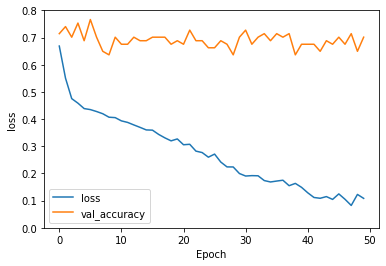

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 0.8])
plt.legend(loc='lower left')

3/3 - 0s - loss: 1.2672 - accuracy: 0.7013 - 31ms/epoch - 10ms/step


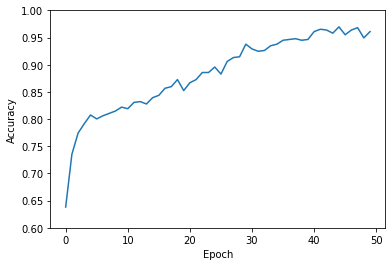

In [19]:
test_loss, test_acc = model.evaluate(Xtest, Ytest, verbose=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.6,1)
plt.plot(history.history['accuracy'], label='accuracy')